- For this simulation, we will use the specparam Python package. Further information regarding the model details can be found at: https://specparam-tools.github.io/.

In [1]:
# Packages 
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from scipy.signal.windows import dpss
from nitime.algorithms.spectral import multi_taper_psd
from mne.time_frequency import psd_array_multitaper
from numpy.lib.stride_tricks import sliding_window_view

from specparam import SpectralModel

from utils.signal_processing import *
from utils.fpp_simulation import *
from utils.plotting import *

---
##### **Characterizing Signal Dynamics Through Their Frequency Content**
This section explores the frequency domain representation of the signal. The Power Spectral Density (PSD) allows us to quantify how the signal's power is distributed across different frequencies, providing a complementary perspective to the temporal dynamics captured by the $\Psi$ operator.

- It is important to remember that an FPP is generated by the convolution of the spike train $s(t)$ (which determines event timing) and the kernel function $k(t)$ (which determines the event shape).

$$
V(t) = s(t) * k(t)
$$

- According to the Convolution Theorem, this implies that the PSD of the FPP, $P_V(f)$, is equivalent to the product of the PSD of the spike train, $P_s(f)$, and the PSD of the kernel function, $P_k(f)$.

$$
P_V(f) = P_s(f) \cdot P_k(f)
$$

In [2]:
# Parameters
t_sec, fs, n_neurons, rate = (200, 10000, 2500, 40)

kernel_dexp, time_dexp = dual_exponential(t_sec = t_sec, 
                                          fs = fs, 
                                          tau_rise_s = 1 / 1000,
                                          tau_decay_s = 5 / 1000, 
                                          max_amplitude = 1)


signal_dexp, time_signal_dexp, _ = simulate_fpp(kernel = kernel_dexp,
                                                fs = fs,
                                                t_sec = t_sec, 
                                                num_neurons = n_neurons, 
                                                rate = rate)


# Since 'simulate_fpp' does not return the spike train, we will have to generate a new one
prob_spike = rate * (1 / fs) 
spikes_pop = np.random.binomial(n = n_neurons, p = prob_spike, size = len(time_signal_dexp)) 

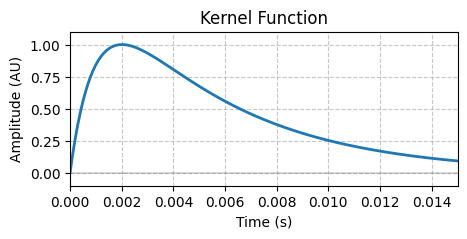

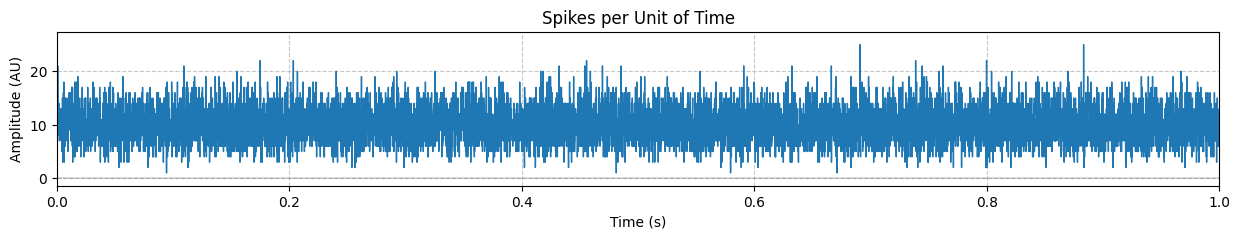

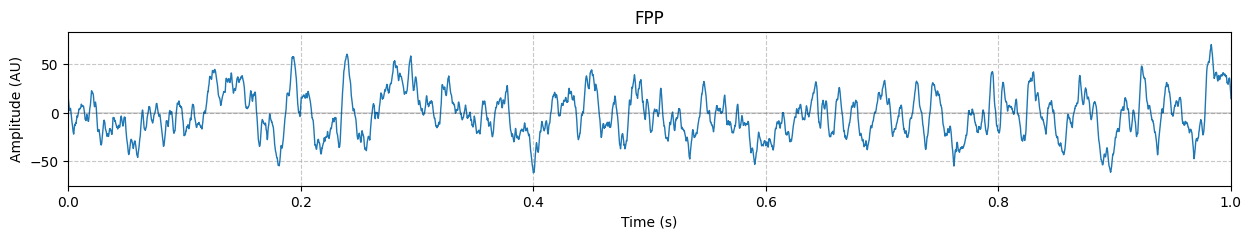

In [3]:
plot_trace(kernel_dexp, time_dexp, title = 'Kernel Function', xlim = (0, 0.015))
plot_trace(spikes_pop, time_signal_dexp, size = (15, 2), xlim = (0, 1), linewidth = 1, title = 'Spikes per Unit of Time')
plot_trace(signal_dexp, time_signal_dexp, size = (15, 2), xlim = (0, 1), linewidth = 1, title = 'FPP')

In [4]:
# We can't use the averaged_multitaper_psd function since the kernel has a long rail of zeros
freqs_kernel_dexp, psd_kernel_dexp, _ = multi_taper_psd(kernel_dexp, Fs = fs, NW = 3, adaptive = False, jackknife = False)

In [5]:
psd_spikes_dexp, freqs_spikes_dexp = averaged_multitaper_psd(signal = spikes_pop, fs = fs, window_sec = 2, overlap_sec = 1)
psd_signal_dexp, freqs_signal_dexp = averaged_multitaper_psd(signal = signal_dexp, fs = fs, window_sec = 2, overlap_sec = 1)

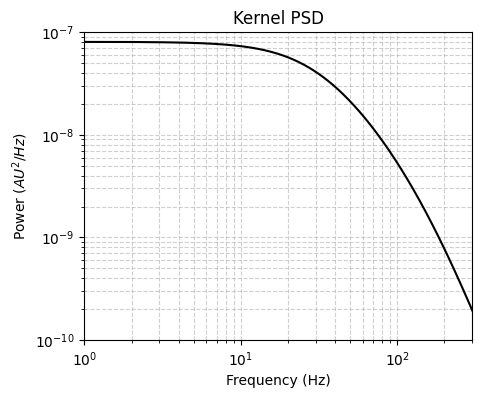

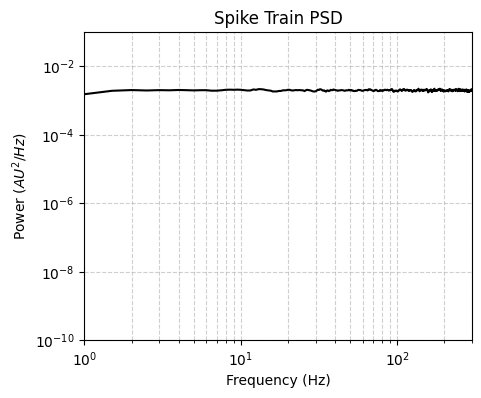

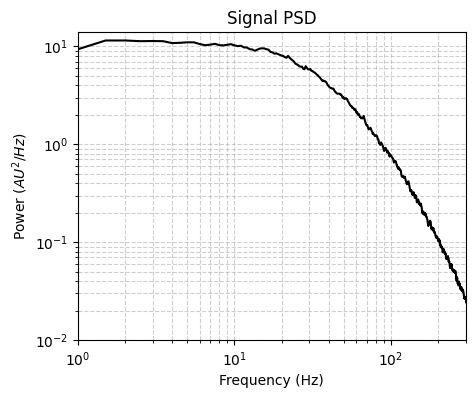

In [6]:
plot_psd_log(psd_kernel_dexp, 
             freqs_kernel_dexp, 
             size = (5, 4), 
             xlim = (1, 300), 
             ylim = (10 ** -10, 10 ** -7), 
             title = 'Kernel PSD', 
             color = 'black', 
             linewidth = 1.5)

plot_psd_log(psd_spikes_dexp, 
             freqs_spikes_dexp, 
             size = (5, 4), 
             xlim = (1, 300), 
             ylim = (10 ** -10, 10 ** -1), 
             title = 'Spike Train PSD', 
             color = 'black', 
             linewidth = 1.5)

plot_psd_log(psd_signal_dexp, 
             freqs_signal_dexp, 
             size = (5, 4), 
             xlim = (1, 300), 
             ylim = (10 ** -2, 14 ** 1),
             title = 'Signal PSD', 
             color = 'black', linewidth = 1.5)


Let's try the same idea but with a square-pulse kernel.

In [7]:
# Parameters
t_sec, fs, n_neurons, rate = (200, 10000, 2500, 40)

kernel_sq, time_sq = triple_square_kernel(t_sec = t_sec,
                                          fs = fs, 
                                          t1_s = 3 /  1000, 
                                          t2_s = 6 / 1000,
                                          t3_s = 9 / 1000,
                                          amplitude1 = 1.0, 
                                          amplitude2 = 1.0, 
                                          amplitude3 = 1.0)

signal_sq, time_signal_sq, _ = simulate_fpp(kernel = kernel_sq,
                                      fs = fs,
                                      t_sec = t_sec, 
                                      num_neurons = n_neurons, 
                                      rate = rate)

# Since 'simulate_fpp' does not return the spike train, we will have to generate a new one
prob_spike = rate * (1 / fs) 
spikes_pop = np.random.binomial(n = n_neurons, p = prob_spike, size = len(time_signal_sq)) 

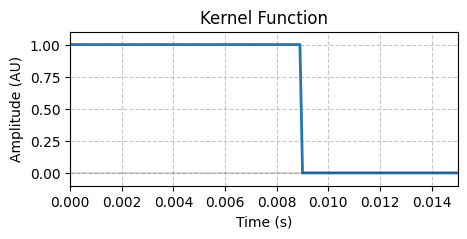

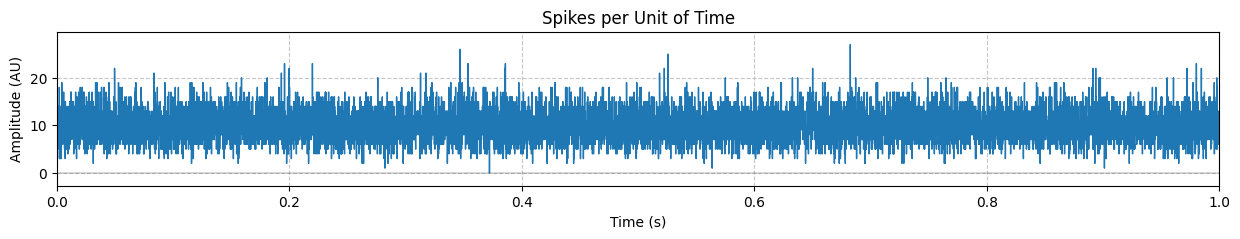

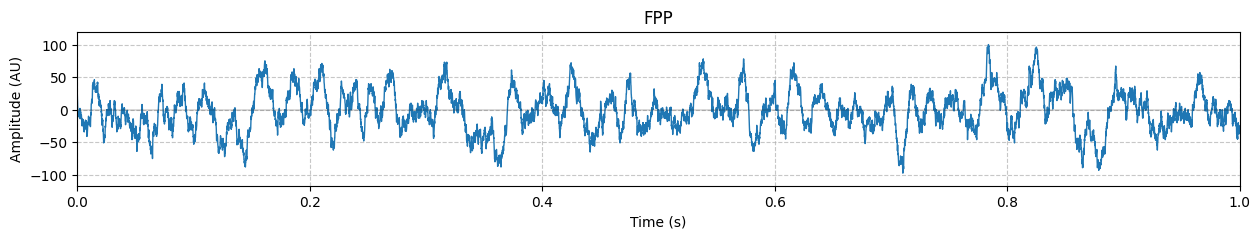

In [8]:
plot_trace(kernel_sq, time_sq, title = 'Kernel Function', xlim = (0, 0.015))
plot_trace(spikes_pop, time_signal_sq, size = (15, 2), xlim = (0, 1), linewidth = 1, title = 'Spikes per Unit of Time')
plot_trace(signal_sq, time_signal_sq, size = (15, 2), xlim = (0, 1), linewidth = 1, title = 'FPP')

In [9]:
# We can't use the averaged_multitaper_psd function since the kernel has a long rail of zeros
freqs_kernel_sq, psd_kernel_sq, _ = multi_taper_psd(kernel_sq, Fs = fs, NW = 3, adaptive = False, jackknife = False)

In [10]:
psd_spikes_sq, freqs_spikes_sq = averaged_multitaper_psd(signal = spikes_pop, fs = fs, window_sec = 2, overlap_sec = 1)
psd_signal_sq, freqs_signal_sq = averaged_multitaper_psd(signal = signal_sq, fs = fs, window_sec = 2, overlap_sec = 1)

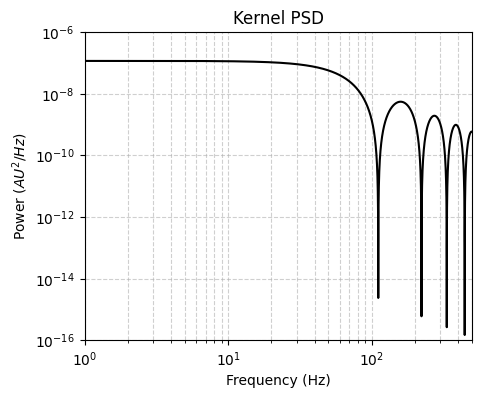

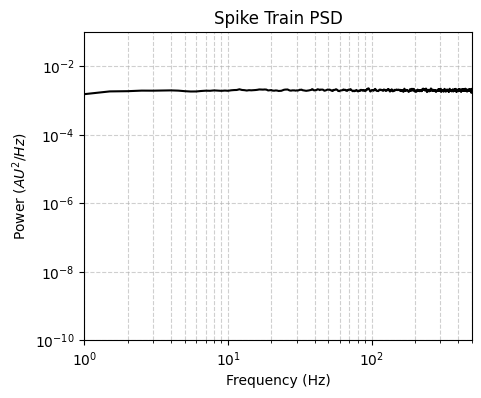

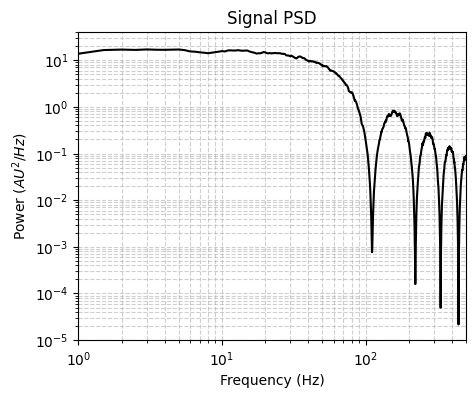

In [11]:
plot_psd_log(psd_kernel_sq, 
             freqs_kernel_sq, 
             size = (5, 4), 
             xlim = (1, 500), 
             ylim = (10 ** -16, 10 ** -6), 
             title = 'Kernel PSD', 
             color = 'black', 
             linewidth = 1.5)

plot_psd_log(psd_spikes_sq, 
             freqs_spikes_sq, 
             size = (5, 4), 
             xlim = (1, 500), 
             ylim = (10 ** -10, 10 ** -1), 
             title = 'Spike Train PSD', 
             color = 'black', 
             linewidth = 1.5)

plot_psd_log(psd_signal_sq, 
             freqs_signal_sq, 
             size = (5, 4), 
             xlim = (1, 500), 
             ylim = (10 ** -5, 40 ** 1),
             title = 'Signal PSD', 
             color = 'black', linewidth = 1.5)

As we can observe, the underlying kernel of a signal is closely linked to its temporal properties and, consequently, to its frequency content in the power spectral density.

---
##### **Parameterizing the Power Spectral Density (PSD)**

The spectral density is another way to characterize signal dynamics. In this context, noisier and more stochastic signals (with rapid amplitude fluctuations) will exhibit greater power at high frequencies. The *specparam* model can quantify this by estimating the decay of the aperiodic component in the PSD. In this sense:

- Signals with faster temporal dynamics will present higher high-frequency content.
- The negative linear relationship between power and frequency (on a log-log scale) frequently observed in these types of signals will be less steep.
- The *specparam* model is capable of estimating the slope of this negative linear relationship.
- Higher high-frequency content implies a smaller (flatter) spectral slope.

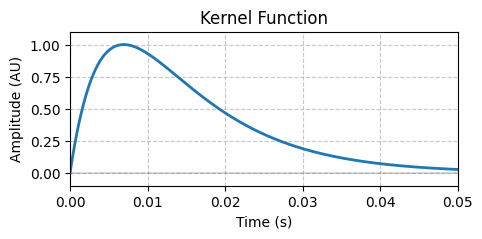

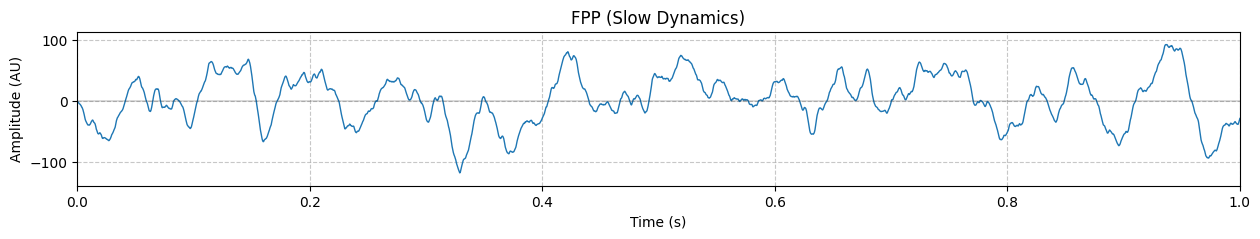

In [12]:
# Parameters
t_sec, fs, n_neurons, rate = (200, 10000, 2500, 40)

# Slow dynamics
kernel_slow, time_slow = dual_exponential(t_sec = t_sec, 
                                          fs = fs, 
                                          tau_rise_s = 5 / 1000,
                                          tau_decay_s = 10 / 1000, 
                                          max_amplitude = 1)

signal_slow, time_signal_slow, _ = simulate_fpp(kernel = kernel_slow,
                                                fs = fs,
                                                t_sec = t_sec, 
                                                num_neurons = n_neurons, 
                                                rate = rate)

plot_trace(kernel_slow, time_slow, title = 'Kernel Function')
plot_trace(signal_slow, time_signal_slow, size = (15, 2), xlim = (0, 1), linewidth = 1, title = 'FPP (Slow Dynamics)')

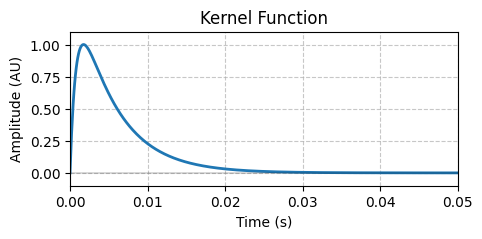

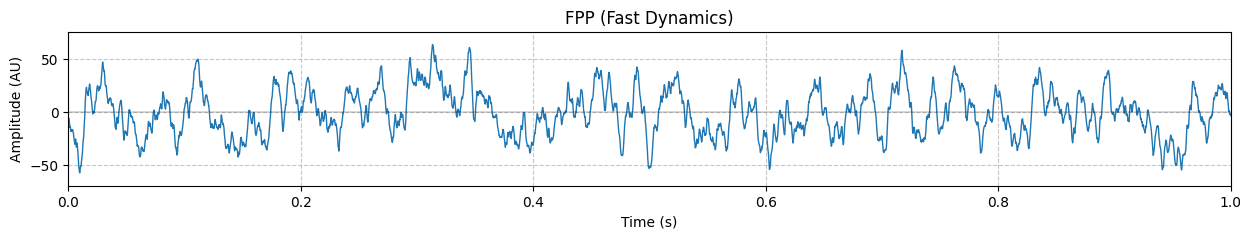

In [13]:
# Parameters
t_sec, fs, n_neurons, rate = (200, 10000, 2500, 40)

# Fast dynamics
kernel_fast, time_fast = dual_exponential(t_sec = t_sec, 
                                          fs = fs, 
                                          tau_rise_s = 0.8 / 1000,
                                          tau_decay_s = 5 / 1000, 
                                          max_amplitude = 1)

signal_fast, time_signal_fast, _ = simulate_fpp(kernel = kernel_fast,
                                                fs = fs,
                                                t_sec = t_sec, 
                                                num_neurons = n_neurons, 
                                                rate = rate)

plot_trace(kernel_fast, time_fast, title = 'Kernel Function')
plot_trace(signal_fast, time_signal_fast, size = (15, 2), xlim = (0, 1), linewidth = 1, title = 'FPP (Fast Dynamics)')

In [14]:
# PSDs
psd_slow, freqs_slow = averaged_multitaper_psd(signal = signal_slow, fs = fs, window_sec = 2, overlap_sec = 1)
psd_fast, freqs_fast = averaged_multitaper_psd(signal = signal_fast, fs = fs, window_sec = 2, overlap_sec = 1)

The *specparam* model parameterizes the signal's spectral density by fitting a power-law function within a specific frequency range. Using the 'doublexp' (double exponent) mode, the model fits two separate exponents divided by a knee frequency.

In [15]:
freq_range = [1, 300]
aperiodic_mode = 'doublexp'

Aperiodic Params: [6.83964869e+00 3.96907913e-01 5.98989942e+04 3.40083382e+00]
Error: 0.026960817919560787
R2: 0.9991728469087432
                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                       The model was fit with the 'spectral_fit' algorithm                        
              Model was fit to the 1-300 Hz frequency range with 0.50 Hz resolution               
                                                                                                  
                              Aperiodic Parameters ('doublexp' mode)                              
                               (offset, exponent0, knee, exponent1)                               
                                6.8396, 0.3969, 59898.9942, 3.4008           

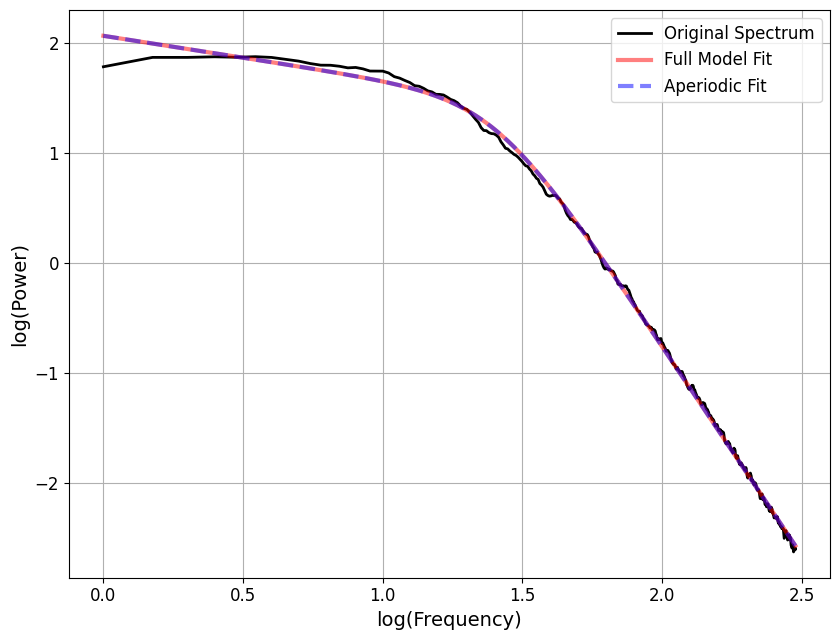

In [16]:
# Slow dynamics
model_slow_doublexp = specparam(psd = psd_slow, freqs = freqs_slow, freq_range = freq_range, aperiodic_mode = aperiodic_mode, verbose = True)
model_slow_doublexp.report(freqs_slow, psd_slow, freq_range, plt_log = True)

Aperiodic Params: [5.62940358e+00 2.28442230e-01 3.09562769e+04 2.61565524e+00]
Error: 0.024834040865606696
R2: 0.9981268799286329
                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                       The model was fit with the 'spectral_fit' algorithm                        
              Model was fit to the 1-300 Hz frequency range with 0.50 Hz resolution               
                                                                                                  
                              Aperiodic Parameters ('doublexp' mode)                              
                               (offset, exponent0, knee, exponent1)                               
                                5.6294, 0.2284, 30956.2769, 2.6157           

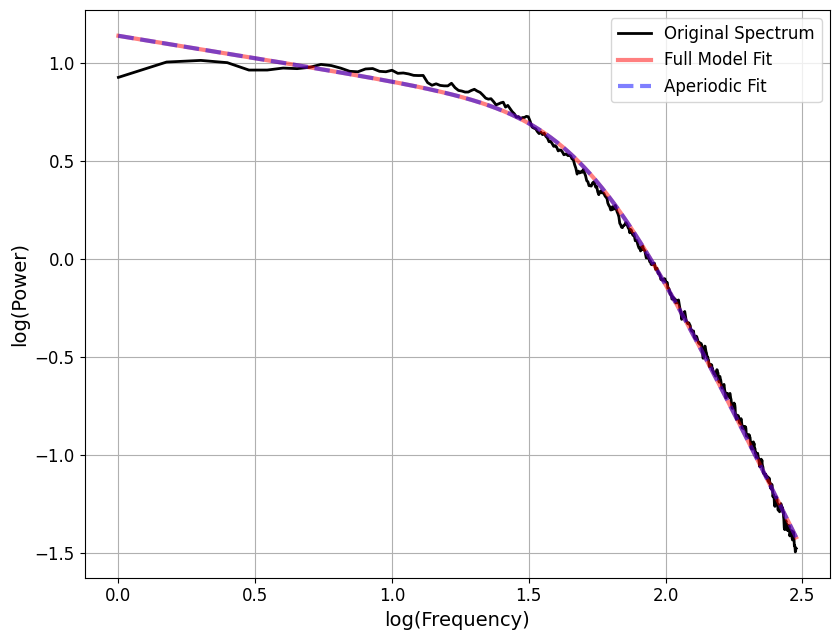

In [17]:
# Fast dynamics
model_fast_doublexp = specparam(psd = psd_fast, freqs = freqs_fast, freq_range = freq_range, aperiodic_mode = aperiodic_mode, verbose = True)
model_fast_doublexp.report(freqs_fast, psd_fast, freq_range, plt_log = True)

In 'fixed' mode, the model fits a $1/f$-like function, which translates to a linear regression on a log-log scale. We will focus on the 40 to 85 Hz frequency range, which shows a clear linear trend in log-log scale.

In [18]:
freq_range = [40, 85] 
aperiodic_mode = 'fixed'

Aperiodic Params: [6.17020125 3.43754779]
Error: 0.01997737123566479
R2: 0.9943722551934244
                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                       The model was fit with the 'spectral_fit' algorithm                        
              Model was fit to the 40-85 Hz frequency range with 0.50 Hz resolution               
                                                                                                  
                               Aperiodic Parameters ('fixed' mode)                                
                                        (offset, exponent)                                        
                                          6.1702, 3.4375                                          
                 

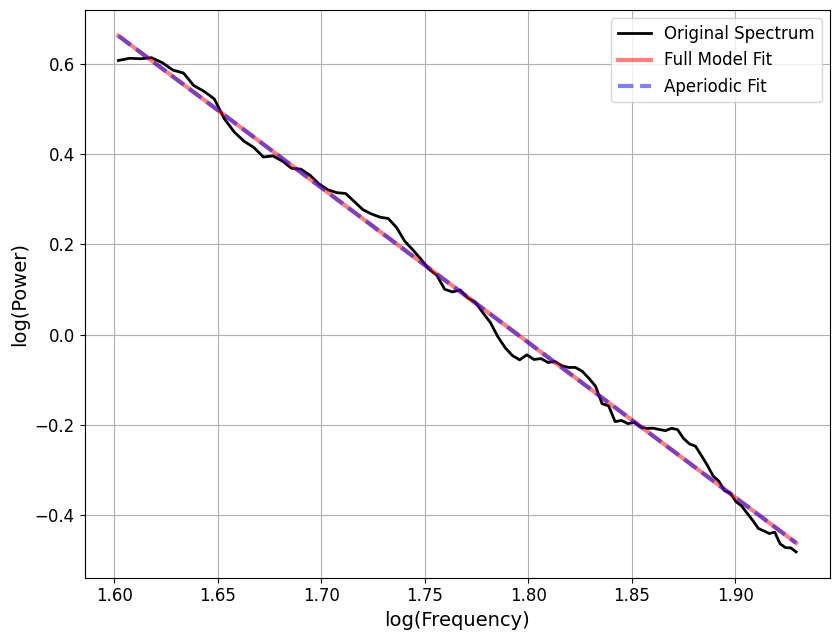

In [19]:
# Slow dynamics
model_slow_linear = specparam(psd = psd_slow, freqs = freqs_slow, freq_range = freq_range, aperiodic_mode = aperiodic_mode, verbose = True)
model_slow_linear.report(freqs_slow, psd_slow, freq_range, plt_log = True)

# Slope of the linear regression
slope_slow_linear = model_slow_linear.results.params.aperiodic.params[1]

Aperiodic Params: [3.33728529 1.71014575]
Error: 0.015366002958975925
R2: 0.9874488762291972
                                                                                                  
                                       POWER SPECTRUM MODEL                                       
                                                                                                  
                       The model was fit with the 'spectral_fit' algorithm                        
              Model was fit to the 40-85 Hz frequency range with 0.50 Hz resolution               
                                                                                                  
                               Aperiodic Parameters ('fixed' mode)                                
                                        (offset, exponent)                                        
                                          3.3373, 1.7101                                          
                

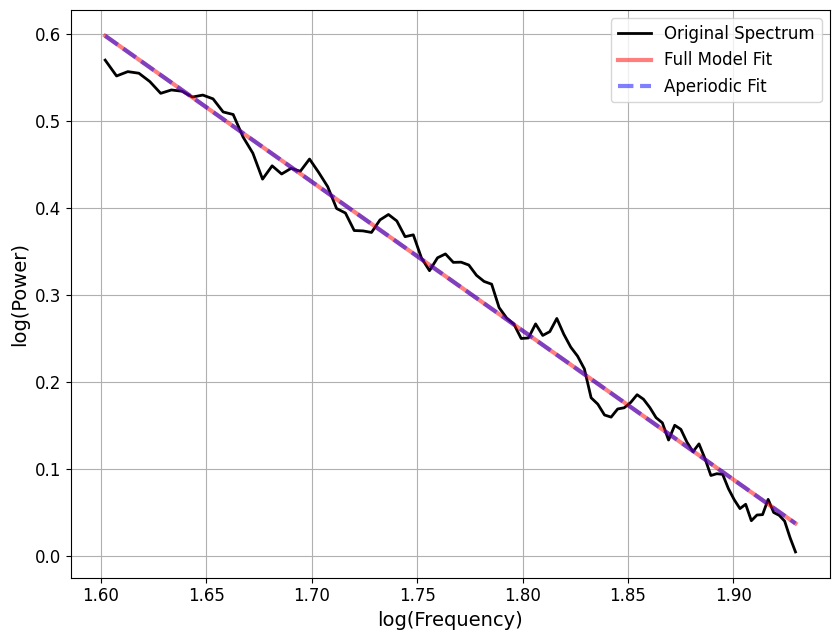

In [20]:
# Fast dynamics
model_fast_linear = specparam(psd = psd_fast, freqs = freqs_fast, freq_range = freq_range, aperiodic_mode = aperiodic_mode, verbose = True)
model_fast_linear.report(freqs_fast, psd_fast, freq_range, plt_log = True)

# Slope of the linear regression
slope_fast_linear = model_fast_linear.results.params.aperiodic.params[1]

As previously mentioned, signals with slower dynamics (resulting from kernels that exert greater filtering due to slower temporal kinetics) exhibit lower spectral power at high frequencies (> 40 Hz), manifesting as a steeper spectral slope.

In [21]:
# Slopes in fast and slow dynamics
print(f'Spectral Slope (40 to 85 Hz) - Slow Dynamics: {slope_slow_linear:.3f}')
print(f'Spectral Slope (40 to 85 Hz) - Fast Dynamics: {slope_fast_linear:.3f}')

Spectral Slope (40 to 85 Hz) - Slow Dynamics: 3.438
Spectral Slope (40 to 85 Hz) - Fast Dynamics: 1.710
